# 1_bin_edge

Este código está diseñado para binarizar images siguiendo los siguientes pasos:
* Aplicar el algoritmo K-means para reducir la cantidad de colores
* Binarizar la imagen con el algoritmos de Otsu (para adelgazar objetos esbeltos)
* Obtener los bordes de los objetos de la imagen (imprimir bordes de objetos grandes)

## Importar bibliotecas

In [55]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Leer imagen

Is folder with pattern
lainGIF/frame3.png
lainGIF/frame1.png
lainGIF/frame7.png
lainGIF/frame5.png
lainGIF/frame2.png
lainGIF/frame0.png
lainGIF/frame4.png
lainGIF/frame6.png
images list size:  8
Image size:  (326, 367, 3)


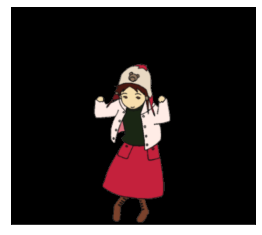

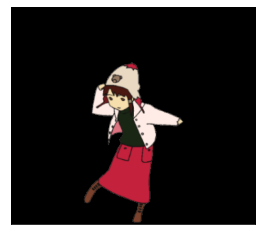

In [ ]:
path = "lainGIF/frame*.png" # folder with pattern
#path = "lain/lain_bear25.png" # single image

files = glob.glob(path)

if os.path.isfile(path): # for a single static image
    print("Is file")
    image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    print("Image size: ", image.shape)
elif os.path.isdir(path):
    print("Is directory")
else:
    # If your set of images is .jpg erase the bin.jpg or edge.jpg images if there is any.
    print("Is folder with pattern") # folder with pattern
    [print(file) for file in glob.glob(path)]
    images = [cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB) for file in glob.glob(path)]

    print("images list size: ", len(images))
    print("Image size: ", images[0].shape)

if len(files) == 1:
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])
else:        
    for image in images: 
        plt.figure()
        plt.imshow(image)
        plt.xticks([]), plt.yticks([])

## Use K-means

In [ ]:
# number of clusters (K)
#k = int(input("Enter the number of clusters: "))
k = 4
    
if len(files) == 1:
    # reshape the image to a 2D array of pixels and 3 color values (RGB)
    pixel_values = image.reshape((-1, 3))
    # convert to float
    pixel_values = np.float32(pixel_values)
    # define stopping criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)
    # flatten the labels array
    labels = labels.flatten()
    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]
    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)

    plt.imshow(segmented_image)
    plt.xticks([]), plt.yticks([])
else:     
    # reshape the image to a 2D array of pixels and 3 color values (RGB)
    pixel_values = [image.reshape((-1, 3)) for image in images]
    # convert to float
    pixel_values = np.float32(pixel_values)

    print("pixel_values list size: ", len(pixel_values))
    print("pixel_values size: ", pixel_values[0].shape)

    # define stopping criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    segmented_images = []
    for pixel_value in pixel_values:
        _, labels, (centers) = cv2.kmeans(pixel_value, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        # convert back to 8 bit values
        centers = np.uint8(centers)
        # flatten the labels array
        labels = labels.flatten()
        # convert all pixels to the color of the centroids
        segmented_image = centers[labels.flatten()]
        #rint("Image size: ", segmented_image.shape)
        # reshape back to the original image dimension
        segmented_image = segmented_image.reshape(image.shape)
        segmented_images.append(segmented_image)


        plt.figure()
        plt.imshow(segmented_image)
        plt.xticks([]), plt.yticks([])

    print("segmented_images list size: ", len(segmented_images))
    print("segmented_images size: ", segmented_images[0].shape) # the same as the original images

## Binary image

In [ ]:
if len(files) == 1:
    gray_image = cv2.cvtColor(segmented_image,cv2.COLOR_BGR2GRAY)
    ret, bin_image = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    plt.imshow(bin_image,cmap="gray")
    plt.xticks([]), plt.yticks([])
else:
    bin_images = []
    for segmented_image in segmented_images: 
        gray_image = cv2.cvtColor(segmented_image,cv2.COLOR_BGR2GRAY)
        ret, bin_image = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        bin_images.append(bin_image)


        plt.figure()
        plt.imshow(bin_image,cmap="gray")
        plt.xticks([]), plt.yticks([])

In [ ]:
answer = input("Save binary images? Yy/Nn: ") 
if answer == "Y" or answer == "y":
    if os.path.isfile(path): # for a single static image
        print(os.path.splitext(path)[0]+"bin.jpg")
        cv2.imwrite(os.path.splitext(path)[0]+"bin.jpg", bin_image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
    #elif os.path.isdir(path):
        #
    else:
        for index,bin_image in enumerate(bin_images):
            ## bin_images in the same folder
            #print(os.path.splitext(files[index])[0]+"bin.jpg")
            #cv2.imwrite(os.path.splitext(files[index])[0]+"bin.jpg", bin_image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
            ## bin_images in bin folder
            if not os.path.exists(os.path.dirname(files[index])+'/bin'):
                os.makedirs(os.path.dirname(files[index])+'/bin')
            print(os.path.dirname(files[index])+"/bin/"+os.path.splitext(os.path.basename(files[index]))[0]+".jpg")
            cv2.imwrite(os.path.dirname(files[index])+"/bin/"+os.path.splitext(os.path.basename(files[index]))[0]+".jpg", bin_image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
            
    print("Binary images saved")
elif answer == "N" or answer == "n": 
    print("Binary images not saved")
else: 
    print("Please enter Y or y or N or n.")

## Edge detector

In [ ]:
if len(files) == 1:
    edgy_image = cv2.Canny(segmented_image, 90, 115)
    plt.imshow(edgy_image,cmap="gray")
    plt.xticks([]), plt.yticks([])
else:
    edgy_images = [cv2.Canny(seg_im, 90, 115) for seg_im in segmented_images]

    for image in edgy_images:
        plt.figure()
        plt.imshow(image,cmap="gray")
        plt.xticks([]), plt.yticks([])

In [ ]:
answer = input("Save edgy images? Yy/Nn: ") 
if answer == "Y" or answer == "y":
    if os.path.isfile(path): # for a single static image
        print(os.path.splitext(path)[0]+"edge.jpg")
        cv2.imwrite(os.path.splitext(path)[0]+"edge.jpg", edgy_image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
    #elif os.path.isdir(path):
    else:
        for index,edgy_image in enumerate(edgy_images): # folder with pattern
            ## bin_images in the same folder
            #print(os.path.splitext(files[index])[0]+"edge.jpg")
            #cv2.imwrite(os.path.splitext(files[index])[0]+"edge.jpg", edgy_image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
            ## bin_images in bin folder
            if not os.path.exists(os.path.dirname(files[index])+'/edge'):
                os.makedirs(os.path.dirname(files[index])+'/edge')
            print(os.path.dirname(files[index])+"/edge/"+os.path.splitext(os.path.basename(files[index]))[0]+".jpg")
            cv2.imwrite(os.path.dirname(files[index])+"/edge/"+os.path.splitext(os.path.basename(files[index]))[0]+".jpg", edgy_image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
        
    print("Edgy images saved")
elif answer == "N" or answer == "n": 
    print("Edgy images not saved")
else: 
    print("Please enter Y or y or N or n.")